In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

4015


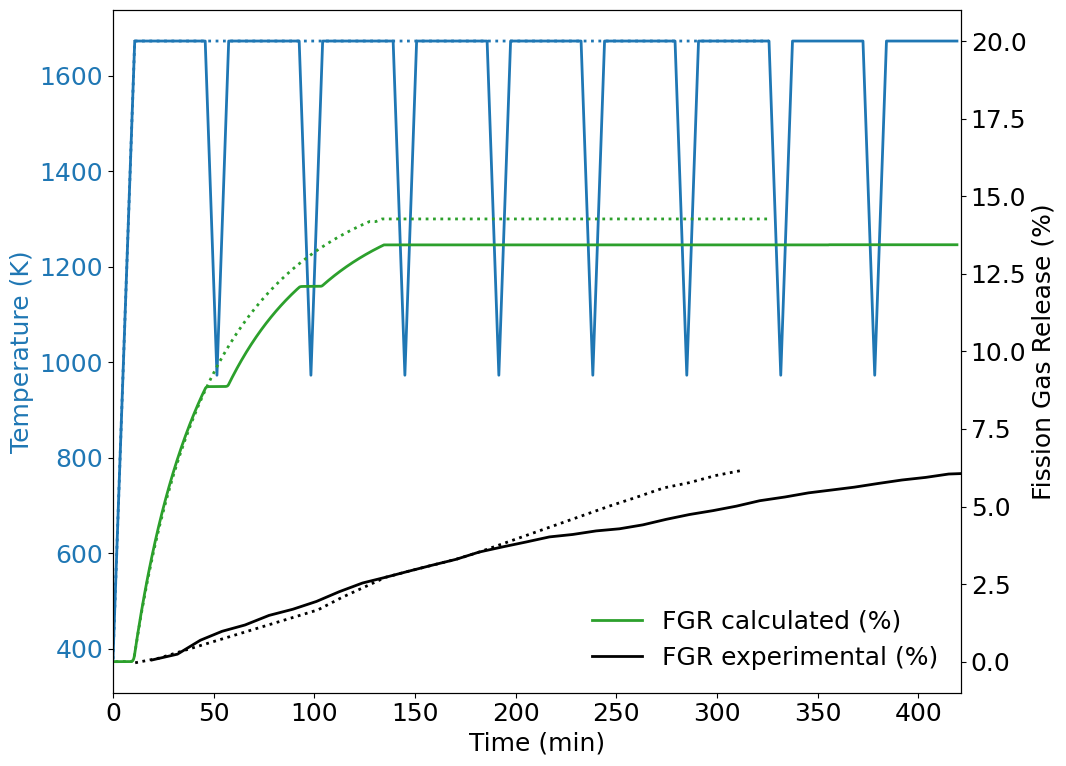

In [2]:
# Leggi i dati da file
data1 = pd.read_csv('test_Kashibe1991_1673K_23_Multiple/output.txt', delimiter='\t')
data2 = pd.read_csv('test_Kashibe1991_1673K_23_Single/output.txt', delimiter='\t')
data = [data1, data2]
labels = ['Cyclic', 'Isothermal']
kinds = ['-', ':']
N = len(data[0])
print(N)

# Dati ISO23
iso23_data = """
11.068411577343866; -0.03468834013740718
22.671144347504963; 0.11047279859867665
101.78068596223976; 1.6688800657174152
113.73501669513304; 2.071105851979345
135.53409038452662; 2.7222240793160815
147.1368231546877; 2.9203304362669087
158.73955592484884; 3.1124237208574552
170.34228869500993; 3.2976913557417404
181.94502146517107; 3.534151363422996
246.92032497807327; 5.021655452980754
259.5778516364308; 5.289805977155375
273.47769109644196; 5.599271545054677
286.369616396621; 5.771583085589111
299.1778278961495; 5.996957216621588
312.2706663178897; 6.163380795910916
"""

# Dati cycle23
cycle23_data = """
19.50676268291558; 0.0567266112857574
32.04019594266178; 0.24234181076593053
43.44247014583533; 0.6915057833732536
54.23382300199917; 0.9795957054993174
65.59314179796105; 1.1827712949700917
77.5204265337211; 1.4910068846815836
89.38685777593132; 1.6906672958066054
101.09817226987734; 1.9417626579657075
112.32862484420441; 2.253224749647943
123.93135761436552; 2.5350875165360396
135.53409038452662; 2.7222240793160815
147.1368231546877; 2.9203304362669087
158.73955592484884; 3.1124237208574552
170.34228869500993; 3.2976913557417404
181.94502146517107; 3.534151363422996
193.54775423533215; 3.699429595596081
205.15048700549323; 3.8564195388401306
216.75321977565437; 4.020885193667233
228.35595254581546; 4.099705196227649
239.9586853159766; 4.214278602011351
251.56141808613768; 4.282535099073982
263.16415085629876; 4.409297165047439
274.7668836264599; 4.587251603817869
286.369616396621; 4.743266454246738
297.97234916678207; 4.867590788182245
309.5750819369432; 5.011416978421359
321.1778147071043; 5.186933685153839
333.8353413654619; 5.308332740643804
345.43807413562297; 5.440457817100752
357.4803043591993; 5.536951376936317
368.20404222252995; 5.624100297293069
380.2462724461063; 5.74517432184464
391.8490052162674; 5.854872263552439
403.6275369677946; 5.938730245657958
415.0544707565896; 6.0474530945505744
421.3832340857684; 6.062079486778282
"""

# Converti i dati in DataFrame
iso23_df = pd.DataFrame([x.split(";") for x in iso23_data.strip().split("\n")], columns=["X", "Y"])
iso23_df = iso23_df.astype(float)

cycle23_df = pd.DataFrame([x.split(";") for x in cycle23_data.strip().split("\n")], columns=["X", "Y"])
cycle23_df = cycle23_df.astype(float)

# Riferimento iniziale per il tempo (time_ref)
time_ref = 18395  # Tempo specifico di riferimento in ore

# Creazione di una nuova colonna "Time (min)" per il tempo relativo in minuti
for i in range(2):  # Itera su data1 e data2
    data[i]["Time (min)"] = (data[i]["Time (h)"] - time_ref) * 60  # Tempo in minuti relativo a time_ref
    fgr_initial = data[i].loc[data[i]["Time (h)"] == time_ref, "Fission gas release (/)"].values[0]  # FGR iniziale al tempo di riferimento
    data[i]["Fission gas release (%)"] = (data[i]["Fission gas release (/)"] - fgr_initial) * 100  # FGR in percentuale rispetto al valore iniziale

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'lines.markersize': 6})  # Corrected parameter for marker size
plt.rcParams.update({'lines.linewidth': 2}) 
fig, ax = plt.subplots(figsize=(11,8))

ax_fgr = ax.twinx()
for i in range(2):
    # Plot della temperatura
    data[i].plot(x="Time (min)", y="Temperature (K)", kind="line", linestyle=kinds[i], ax=ax, color="C0", label=labels[i])
    data[i].plot(x="Time (min)", y="Fission gas release (%)", kind="line", linestyle=kinds[i], ax=ax_fgr, color="C2", legend=False)

# Plot dei dati ISO23 e cycle23
ax_fgr.plot(iso23_df["X"], iso23_df["Y"], label="ISO23", color="black", linestyle=":")
ax_fgr.plot(cycle23_df["X"], cycle23_df["Y"], label="cycle23", color="black", linestyle="-")

# Impostazioni dell'asse principale (Temperatura)
ax.set_xlabel("Time (min)")  # Asse x in minuti
ax.set_ylabel("Temperature (K)", color='C0')
ax.tick_params(axis='y', labelcolor='C0')

# Impostazioni dell'asse secondario (FGR in %)
ax_fgr.set_ylabel("Fission Gas Release (%)")
ax_fgr.set_ylim([-1, 21])

# Impostazioni aggiuntive dell'asse x
ax.set_xlim([0, (18401.9855 - time_ref) * 60 + 2])  # Limiti dell'asse x in minuti

custom_lines = [plt.Line2D([0], [0], color='C2', linestyle='-', label='FGR calculated (%)'),
                plt.Line2D([0], [0], color='k', linestyle='-',  label='FGR experimental (%)')]
ax.legend(handles=custom_lines, loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig('Images/FGRRamp23_Kashibe1991')
plt.show()


4516


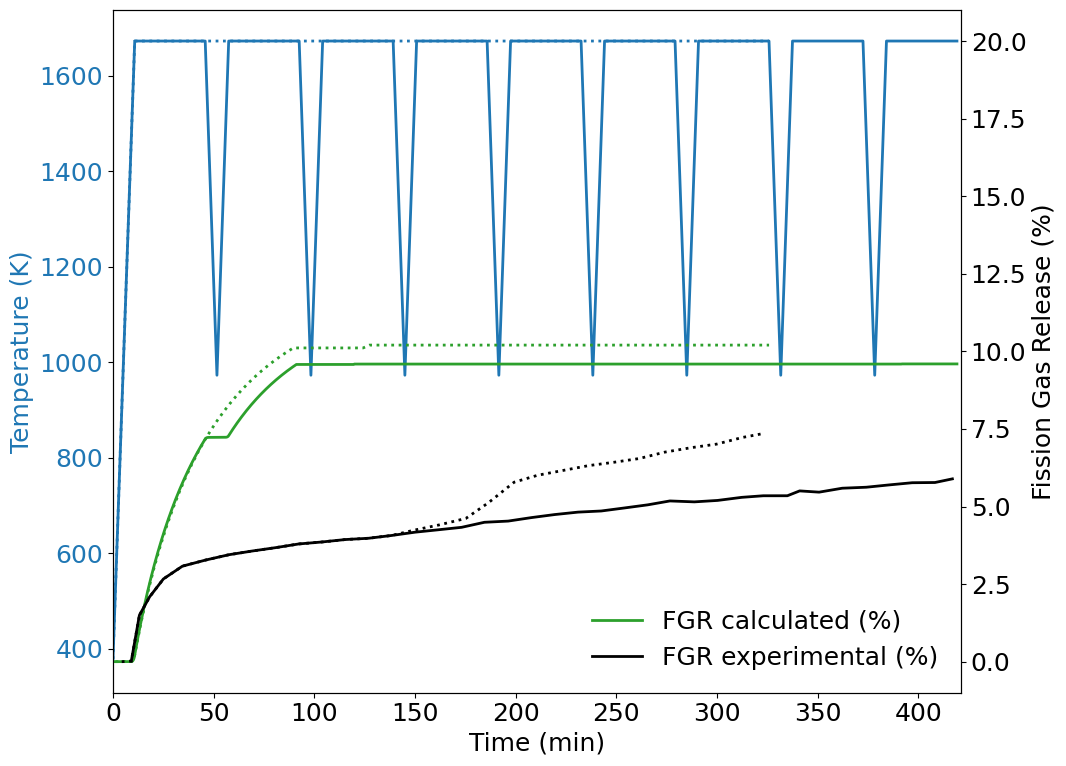

In [3]:
data1 = pd.read_csv('test_Kashibe1991_1673K_28_Multiple/output.txt', delimiter='\t')
data2 = pd.read_csv('test_Kashibe1991_1673K_28_Single/output.txt', delimiter='\t')
data = [data1, data2]
labels = ['Cyclic', 'Isothermal']
kinds = ['-', ':']
N = len(data[0])
print(N)

cycle28_data = """
9.140119319097948; 0.02019367028814223
13.166563011079617; 1.498819083608879
18.24338331836084; 2.0911667453944247
25.070831317808015; 2.6661139656618413
34.5242208555041; 3.0782496671962907
46.078363623799305; 3.275862068965518
57.63250639209453; 3.4472023017134
69.18664916038972; 3.566324558766693
80.74079192868496; 3.6740241336367916
92.29493469698016; 3.793962296560313
103.84907746527537; 3.8576029544380965
115.40322023357058; 3.9359299179799887
126.95736300186579; 3.9775411173616178
138.511505770161; 4.068106668956927
150.0656485384562; 4.173358526216344
161.6197913067514; 4.250869583888006
173.17393407504662; 4.330012453300123
184.50299614006335; 4.4923544098792085
196.28221961163703; 4.530725297376216
207.83636237993224; 4.643320307467684
219.39050514822745; 4.741229011895047
230.94464791652265; 4.819555975436938
242.49879068481792; 4.856271739597199
254.05293345311313; 4.954180444024562
265.6070762214083; 5.054536866062611
276.59563158146534; 5.179935322117654
288.7153617579987; 5.149997852879288
300.269504526294; 5.196504487482285
312.2613042176307; 5.295790033065659
322.9401331398428; 5.3468351440717985
334.93193283117955; 5.347283892300423
341.0241171999171; 5.503448275862068
350.6875820606731; 5.46330570704685
362.16092662779135; 5.5900221648922646
374.11098058185337; 5.6219178082191785
385.35001036555866; 5.695838880061837
396.9041531338539; 5.766822690771674
408.2159012986184; 5.773939900439663
416.86130882454563; 5.891166745394425
"""

iso28_data = """
4.386491816524284; 0.0
9.140119319097948; 0.02019367028814223
13.166563011079617; 1.498819083608879
12.991500241863022; 1.4741379310344822
18.24338331836084; 2.0911667453944247
25.070831317808015; 2.6661139656618413
34.5242208555041; 3.0782496671962907
46.078363623799305; 3.275862068965518
57.63250639209453; 3.4472023017134
69.18664916038972; 3.566324558766693
80.74079192868496; 3.6740241336367916
92.29493469698016; 3.793962296560313
103.84907746527537; 3.8576029544380965
115.40322023357058; 3.9359299179799887
126.95736300186579; 3.9775411173616178
138.511505770161; 4.068106668956927
149.54046023080642; 4.237978271138402
161.8823854605763; 4.4055857345299945
175.27468730564576; 4.617619272555503
186.52872246956966; 5.124704770902218
199.25828668831915; 5.784364666981576
210.98749222583095; 6.008738781294284
236.1965309930205; 6.31837505904582
248.80105037661528; 6.426074633915919
261.40556976021; 6.547236655644781
274.01008914380486; 6.752165013383719
287.1397968350494; 6.896138403401039
299.74431621864414; 7.01056920170052
312.6114297560638; 7.225968351440718
323.20272729366775; 7.354983467170523
"""

# Converti i dati in DataFrame
iso28_df = pd.DataFrame([x.split(";") for x in iso28_data.strip().split("\n")], columns=["X", "Y"])
iso28_df = iso28_df.astype(float)

cycle28_df = pd.DataFrame([x.split(";") for x in cycle28_data.strip().split("\n")], columns=["X", "Y"])
cycle28_df = cycle28_df.astype(float)

# Riferimento iniziale per il tempo (time_ref)
time_ref = 22410  # Tempo specifico di riferimento in ore

# Creazione di una nuova colonna "Time (min)" per il tempo relativo in minuti
for i in [0, 1]:
    data[i]["Time (min)"] = (data[i]["Time (h)"] - time_ref) * 60  # Tempo in minuti relativo a time_ref
    fgr_initial = data[i].loc[data[i]["Time (h)"] == time_ref, "Fission gas release (/)"].values[0]  # FGR iniziale al tempo di riferimento
    data[i]["Fission gas release (%)"] = (data[i]["Fission gas release (/)"] - fgr_initial) * 100  # FGR in percentuale rispetto al valore iniziale

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'lines.markersize': 6})  # Corrected parameter for marker size
plt.rcParams.update({'lines.linewidth': 2}) 
fig, ax = plt.subplots(figsize=(11,8))
ax_fgr = ax.twinx()
for i in [0, 1]:
    # Plot della temperatura
    data[i].plot(x="Time (min)", y="Temperature (K)", kind="line", linestyle=kinds[i], ax=ax, color="C0", legend=False)
    data[i].plot(x="Time (min)", y="Fission gas release (%)", kind="line", linestyle=kinds[i], ax=ax_fgr, color="C2", legend=False)

ax_fgr.plot(iso28_df["X"], iso28_df["Y"], color="black", linestyle=":")
ax_fgr.plot(cycle28_df["X"], cycle28_df["Y"], color="black", linestyle="-")

# Impostazioni dell'asse principale (Temperatura)
ax.set_xlabel("Time (min)")  # Asse x in minuti
ax.set_ylabel("Temperature (K)", color='C0')
ax.tick_params(axis='y', labelcolor='C0')

# Impostazioni dell'asse secondario (FGR in %)
ax_fgr.set_ylabel("Fission Gas Release (%)")
ax_fgr.set_ylim([-1, 21])

# Impostazioni aggiuntive dell'asse x
ax.set_xlim([0, (22416.9855 - time_ref) * 60+2])  # Limiti dell'asse x in minuti

custom_lines = [plt.Line2D([0], [0], color='C2', linestyle='-',  label='FGR calculated (%)'),
                plt.Line2D([0], [0], color='k', linestyle='-', label='FGR experimental (%)')]
ax.legend(handles=custom_lines, loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig('Images/FGRRamp28_Kashibe1991')
plt.show()
